<center><h1>Wagh_Atharva_HW2</h1></center>
<br>
<br>

Name: Atharva Vilas Wagh
<br>
Github Username: awagh29
<br>
USC ID: 5942406612

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install -r requirements.txt

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from collections import Counter
import math
from decimal import Decimal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Get the Cycle Power Plant Data Set

In [4]:
DATA_DIR = '../data/'

In [5]:
data = ""
if os.path.isdir(DATA_DIR):
    print("Fetching data files")
    for filename in os.listdir(DATA_DIR):
        print(f"Looking for {filename}")
        fullpath = os.path.join(DATA_DIR, filename)
        if os.path.join(DATA_DIR, filename) and filename.endswith('.xlsx'):
            print(f"Data file {filename} path: {fullpath}")
            data = fullpath

Fetching data files
Looking for .ipynb_checkpoints
Looking for Folds5x2_pp.ods
Looking for Folds5x2_pp.xlsx
Data file Folds5x2_pp.xlsx path: ../data/Folds5x2_pp.xlsx
Looking for Readme.txt
Looking for Readme.txt~


In [6]:
data_file_dict = pd.read_excel(data, sheet_name=None)

In [14]:
df = pd.concat(data_file_dict.values(), ignore_index=True)
print(df.shape)
df.head(5)

(47840, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data

#### i. rows and columns

In [17]:
print(f'There are {len(df)} rows')
print(f'There are {len(df.columns)} columns namely, {df.columns}')

There are 47840 rows
There are 5 columns namely, Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='str')


##### The columns represent the attributes such as  Temperature (AT), Ambient Pressure (AP),
##### Relative Humidity (RH), Exhaust Vacuum (V) 
##### And the PREDICTOR VARIBALE Energy Output (PE)
##### The rows represent the data points for the six year data.

#### ii. pairwise scatterplots of all the varianbles

##### So the scatter plots will be basically PE VS the other variables

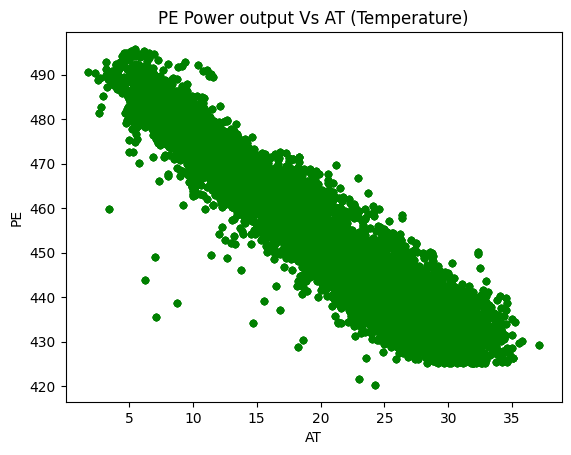

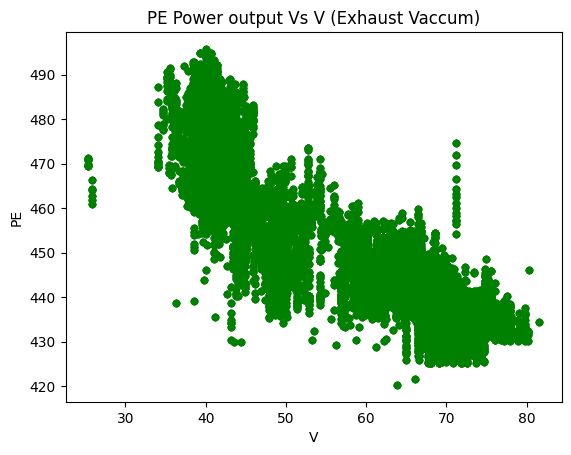

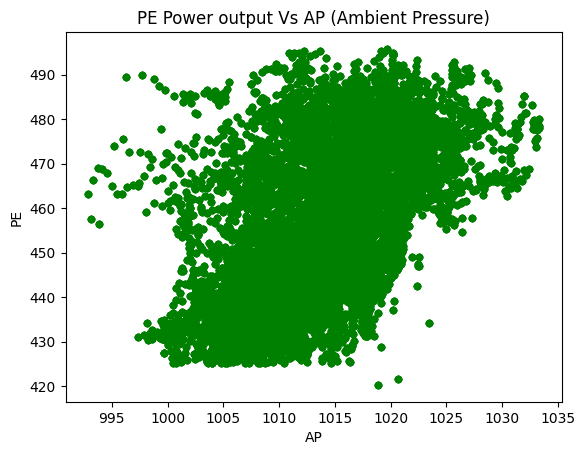

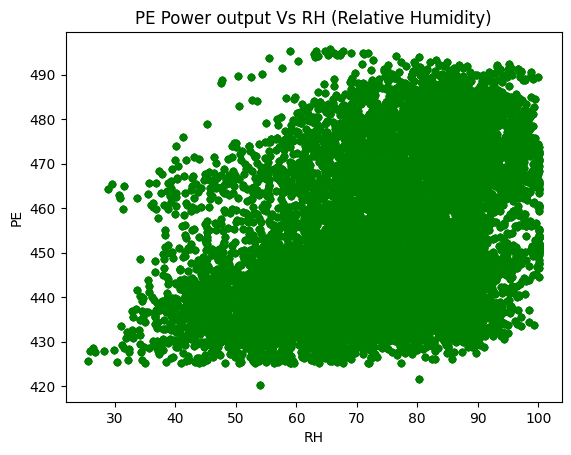

In [22]:
cols = df.columns
tt = ['PE Power output Vs AT (Temperature)', 'PE Power output Vs V (Exhaust Vaccum)', 
     'PE Power output Vs AP (Ambient Pressure)', 'PE Power output Vs RH (Relative Humidity)']
for i in range(len(cols) - 1):
    df.plot.scatter(x=cols[i], y='PE', title = tt[i], c='green')
    plt.show()

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [34]:
table = df[cols].describe().T

headers = ['Name', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
md_res = "| " + " | ".join(headers) + " |\n"
md_res += "| " + " | ".join(["---"] * len(headers)) + " |\n"

row = [""]
for c, r in table.iterrows():
    row = [c]
    for h in headers[1:]:
        val = r.get(h, 0)
        row.append(f"{val:.2f}")
    md_res += "| " + " | ".join(row) + " |\n"
    
print(md_res)

| Name | count | mean | std | min | 25% | 50% | 75% | max |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| AT | 47840.00 | 19.65 | 7.45 | 1.81 | 13.51 | 20.34 | 25.72 | 37.11 |
| V | 47840.00 | 54.31 | 12.71 | 25.36 | 41.74 | 52.08 | 66.54 | 81.56 |
| AP | 47840.00 | 1013.26 | 5.94 | 992.89 | 1009.10 | 1012.94 | 1017.26 | 1033.30 |
| RH | 47840.00 | 73.31 | 14.60 | 25.56 | 63.33 | 74.97 | 84.83 | 100.16 |
| PE | 47840.00 | 454.37 | 17.07 | 420.26 | 439.75 | 451.55 | 468.43 | 495.76 |



### (c) Simple Linear Regression

In [55]:
def simplelr(X, y, col):
    a = X.sample(n=1).iloc[0]
    X = np.array(X).reshape(-1, 1)
    y = np.array(df['PE'])
    model = LinearRegression()
    model.fit(X, y)
    print(f"Intercept (c): {model.intercept_}")
    print(f"Slope (m): {model.coef_[0]}")
    X_new = np.array(a).reshape(-1, 1)
    y_pred = model.predict(X_new)
    print(f"Prediction for {col} = {a}: {y_pred[0]}")
    plt.scatter(X, y, color='blue')
    plt.plot(X, model.predict(X), color = "green")
    plt.title(f"Simple Linear Regression for PE as y and {col} as x")
    plt.xlabel(col)
    plt.ylabel("Power Generated")
    plt.show()
    

Intercept (c): 497.0341198927665
Slope (m): -2.171319958517786
Prediction for AT = 15.21: 464.00834332371096


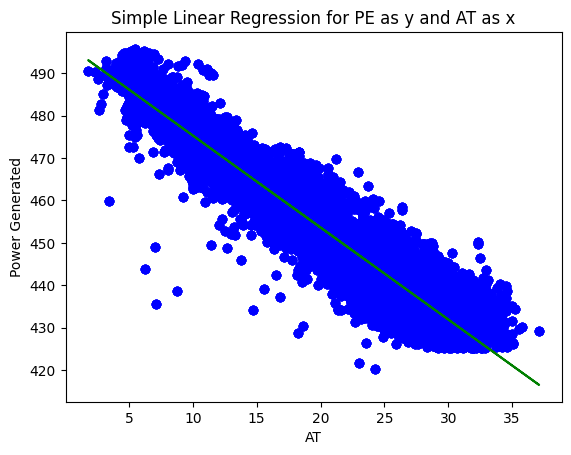

Intercept (c): 517.8015263083856
Slope (m): -1.1681351265557092
Prediction for V = 55.5: 452.9700267845438


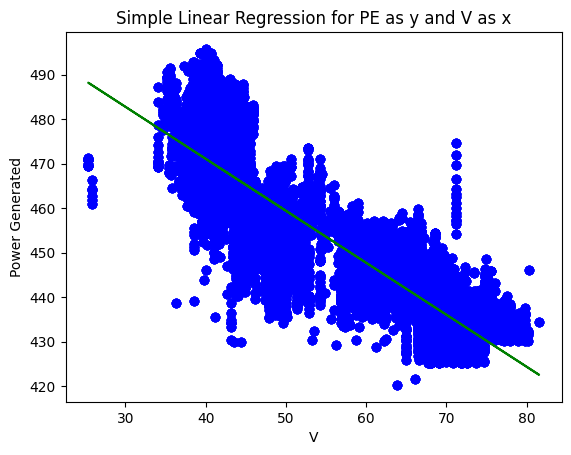

Intercept (c): -1055.2609889844405
Slope (m): 1.4898716733991146
Prediction for AP = 1006.56: 444.3842425921723


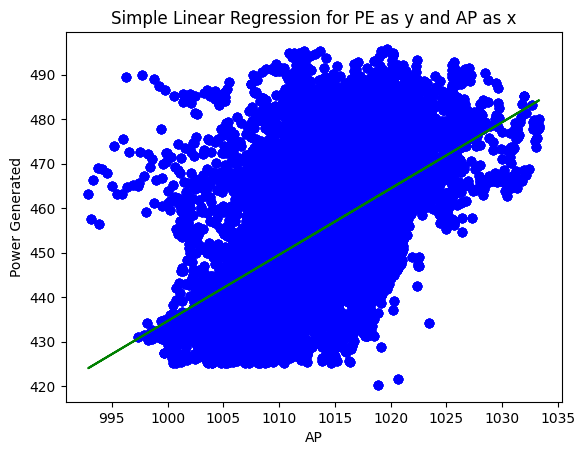

Intercept (c): 420.9617661554838
Slope (m): 0.45565010226298025
Prediction for RH = 87.26: 460.72179407895146


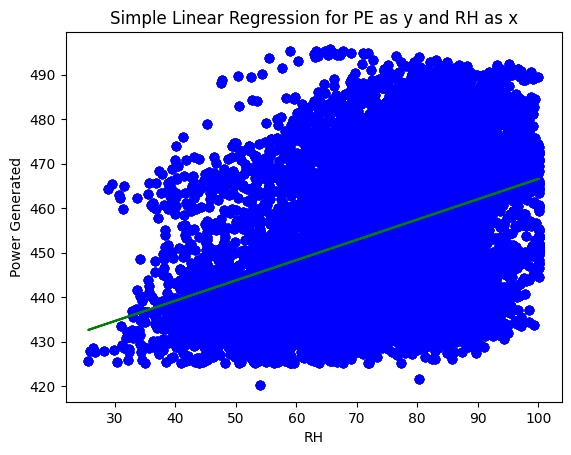

In [58]:
for i in range(len(cols) - 1):
    X = df[cols[i]]
    y = df[cols[len(cols) - 1]]
    simplelr(X, y, cols[i])

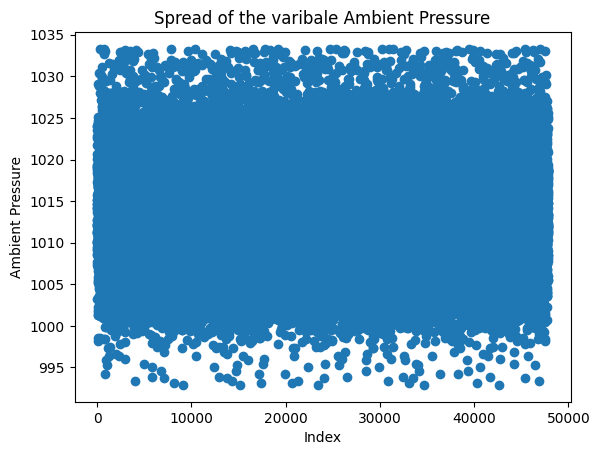

In [60]:
df['AP'].plot(style='o')
plt.ylabel('Ambient Pressure')
plt.xlabel('Index')
plt.title('Spread of the varibale Ambient Pressure')
plt.show()

In [61]:
c = df['PE'].mean() - (1.49 * df['AP'].mean())
print(c)

-1055.3910170777592


##### Ambient Pressure was the only case where I found the y-intercept to be negative
##### Temperature (AT) Vs Energy Output(PE) had the highest 'magnitude' of slope with m = '-2.17' approx
##### Temperature and Energy Output are inversely proportional here and there is a landsliding drop in energy
##### generation as the temperature increases
##### Now we can also observe the outlier points in the above scatter plots for various varibales which we can filter out

##### Before moving ahead lets draw somw box plots and do an outlier analysis

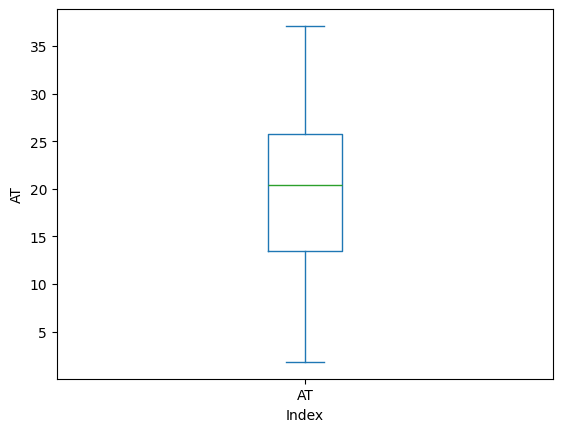

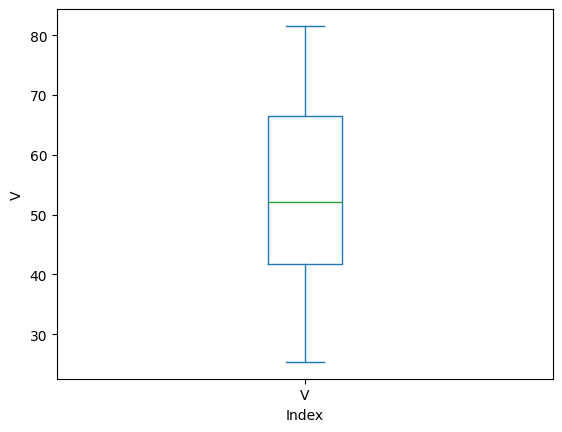

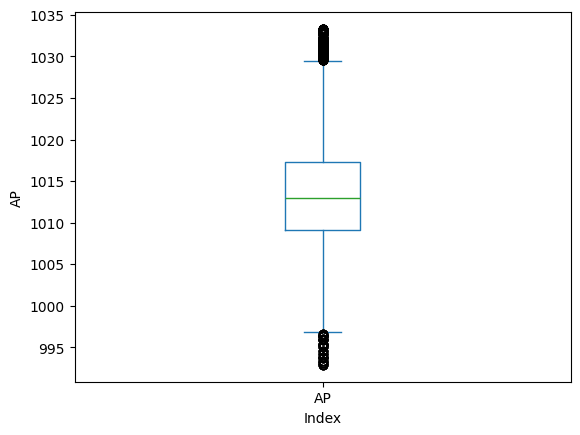

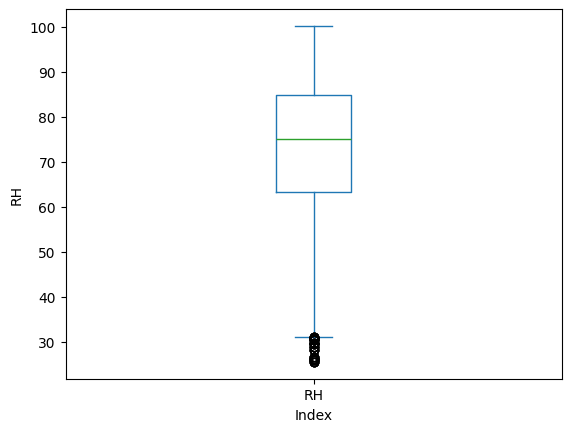

In [62]:
for i in range(len(cols) - 1):
    df[cols[i]].plot.box()
    plt.ylabel(cols[i])
    plt.xlabel('Index')
    plt.show()

##### Okay so right now it is not wise to discard the outliers since we don't know the combined effect of other varibales on that data point, an outlier in simple regression maybe a plausible point in multiple Reg.

### (d) Multiple Regression

In [75]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.558e+05
Date:                Mon, 09 Feb 2026   Prob (F-statistic):               0.00
Time:                        20:13:10   Log-Likelihood:            -1.4044e+05
No. Observations:               47840   AIC:                         2.809e+05
Df Residuals:                   47835   BIC:                         2.809e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      4.359    104.298      0.0

##### In this case all four predictors are statisitically significant in the multiple regression
##### For AT coef is -1.98, meaning for each 1deg increase PE decreases by 1.98~2
##### For V coef is -0.23, meaning higher vaccum lower PE
##### For AP coef is 0.06 which is positive, meaning as pressure increases there is a small gain in the output
##### For RH coef is -0.15, meaning as humidity increases output decreases slightly
##### The null hypothesis for each predictor is Ho : βj = 0
##### The r-Squared was found to be 92.9%, meaning the model explans 92.9% of the variance in power output, hence, overall it can be said that it is statistically significant

### (e) 1c Compare to 1d

### (f) Nonlinear Association

### (g) Interactions of Predictors

### (h) Improvement

In [ ]:
def multiLinReg(X, y):
    # X will be split into X-train, X-test
    # y will be split into y-train, y-test
    # NOTE: Uh, I am doing a 80-20 train-test split for this case
    # model = LinearRegression()
    X = np.array(X, dtype='float32')
    y = np.array(y, dtype='float32')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
    
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    beta = np.linalg.pinv(X_train).dot(y_train)
    predictions = X_test.dot(beta)
    
    ss_res = np.sum((y_test - predictions)**2)
    ss_total = np.sum((y_test - np.mean(y_test))**2)
    r2 = 1 - (ss_res/ss_total)
    
    return r2, y_test, predictions

### (i) KNN

### (j ) Compare KNN and Linear

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

### (c) The relationship between the predictors and response is highly non-linear.

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

### (b) What is our prediction with K = 1? Why?

### (c) What is our prediction with K = 3? Why?

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?